# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
# Your code here! 
credit_df = pd.read_csv('GermanCredit.csv')
credit_df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
Duration                                  1000 non-null int64
Amount                                    1000 non-null int64
InstallmentRatePercentage                 1000 non-null int64
ResidenceDuration                         1000 non-null int64
Age                                       1000 non-null int64
NumberExistingCredits                     1000 non-null int64
NumberPeopleMaintenance                   1000 non-null int64
Telephone                                 1000 non-null int64
ForeignWorker                             1000 non-null int64
Class                                     1000 non-null object
CheckingAccountStatus.lt.0                1000 non-null int64
CheckingAccountStatus.0.to.200            1000 non-null int64
CheckingAccountStatus.gt.200              1000 non-null int64
CheckingAccountStatus.none                1000 non-null int64
CreditHistory.NoCredit.Al

In [4]:
credit_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
InstallmentRatePercentage,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
ResidenceDuration,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
NumberExistingCredits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
NumberPeopleMaintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
Telephone,1000.0,0.596,0.490943,0.0,0.0,1.0,1.00,1.0
ForeignWorker,1000.0,0.963,0.188856,0.0,1.0,1.0,1.00,1.0
CheckingAccountStatus.lt.0,1000.0,0.274,0.446232,0.0,0.0,0.0,1.00,1.0


In [4]:
# Prepare the training and testing data
X = credit_df.drop('Class',axis=1)
y = credit_df['Class']

In [5]:
X.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,0,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
# Create the parameter grid based on the results of random search 
param_grid = {
    
    'max_depth': [5,10,20,40,60,80, 90, 100, 110],
    'max_features': ["sqrt", "log2",None],
    'min_samples_leaf': [2,3, 4, 5,6],
    'min_samples_split': [3,5,8, 10, 12,14,16],
    }
# Create a base model
dt_clf = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search_dt = GridSearchCV(estimator = dt_clf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [8]:
grid_search_dt.fit(X_train,y_train)

Fitting 5 folds for each of 945 candidates, totalling 4725 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 649 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 2273 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 4537 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 4725 out of 4725 | elapsed:   29.7s finished
C:\Users\sriga\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 40, 60, 80, 90, 100, 110],
                         'max_features': ['sqrt', 'log2', Non

In [9]:
grid_search_dt.best_params_

{'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [10]:
grid_search_dt.best_score_

0.72

In [23]:
dt_clf = DecisionTreeClassifier(max_depth=5,max_features='log2',min_samples_leaf=3,min_samples_split=5)

In [26]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
y_predict_dt = dt_clf.predict(X_test)

In [28]:
print(classification_report(y_test,y_predict_dt))

              precision    recall  f1-score   support

         Bad       0.43      0.17      0.24        59
        Good       0.72      0.91      0.81       141

    accuracy                           0.69       200
   macro avg       0.58      0.54      0.52       200
weighted avg       0.64      0.69      0.64       200



In [47]:
y_train.values

array(['Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad',
       'Good', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Good',
       'Bad', 'Good', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Good',
       'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Good',
       'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad',
       'Good', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Bad',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Good',
       'Good', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Good',
       'Ba

### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [13]:
! pip install dtreeviz

  Stored in directory: C:\Users\sriga\AppData\Local\pip\Cache\wheels\3b\50\6b\c9e82550ad7ab31b18a974df0683385eb20dd4e922fe316048
Successfully built dtreeviz


If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [14]:
# Your code here! :)
from sklearn import tree
from dtreeviz.trees import *

In [70]:
y_train


29      Bad
535     Bad
695    Good
557     Bad
836    Good
596     Bad
165    Good
918     Bad
495     Bad
824    Good
65     Good
141    Good
925     Bad
827     Bad
655    Good
331     Bad
664    Good
249     Bad
907    Good
708    Good
305    Good
734    Good
975    Good
49     Good
896    Good
2      Good
544    Good
350    Good
904    Good
536    Good
       ... 
955    Good
191     Bad
385    Good
805     Bad
413    Good
491     Bad
343    Good
769    Good
308     Bad
661     Bad
130    Good
663    Good
871    Good
99     Good
372    Good
87      Bad
458    Good
330    Good
214    Good
466     Bad
121    Good
614     Bad
20     Good
700     Bad
71     Good
106     Bad
270    Good
860    Good
435     Bad
102    Good
Name: Class, Length: 800, dtype: object

In [78]:
viz = dtreeviz(dt_clf,
               X_train,
               y_train_b.ravel(),
               target_name = 'Class',
               feature_names=X_train.columns.values,
               class_names= ['Good','Bad']
               )
viz.view()

In [51]:
classifier = tree.DecisionTreeClassifier(max_depth=2)  # limit depth of tree
iris = load_iris()
classifier.fit(iris.data, iris.target)

viz = dtreeviz(classifier, 
               iris.data, 
               iris.target,
               target_name='variety',
              feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"]  # need class_names for classifier
              )  
              
viz.view() 

In [72]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_reg = RandomForestClassifier(random_state=42)

In [38]:
#Original params_grid
params_grid = {"max_depth": [3,10,20,50],
               "bootstrap":[True,False],
               "n_estimators":[100,200,300,1000,1500],
               "criterion":['gini','entropy']
    
}

In [39]:
grid_search_rf = GridSearchCV(estimator = rf_reg,param_grid=params_grid,n_jobs=-1,cv=3,verbose=1)

In [40]:
grid_search_rf.fit(X_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 10, 20, 50], 'bootstrap': [True, False], 'n_estimators': [100, 200, 300, 1000, 1500], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [41]:
# Display the best params that was selected
grid_search_rf.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'n_estimators': 1500}

In [42]:
# Display the best params that was selected
grid_search_rf.best_score_

0.75375000000000003

In [55]:
rf_clf = RandomForestClassifier(n_estimators = 1500, criterion='gini',max_depth=10, bootstrap='True',random_state=42)

In [58]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [59]:
y_predict_rf_clf = rf_clf.predict(X_test)

In [60]:
print(classification_report(y_test,y_predict_rf_clf))

             precision    recall  f1-score   support

        Bad       0.77      0.39      0.52        59
       Good       0.79      0.95      0.86       141

avg / total       0.78      0.79      0.76       200



In [57]:
rf_clf.feature_importances_

array([ 0.07633581,  0.09964569,  0.03235697,  0.0287012 ,  0.08097699,
        0.01849014,  0.00914264,  0.01450978,  0.00352204,  0.04323783,
        0.01738166,  0.00738048,  0.05857198,  0.01860828,  0.01306143,
        0.01251521,  0.00897318,  0.02531608,  0.02060113,  0.00899457,
        0.01059651,  0.01433614,  0.00212909,  0.00415485,  0.0111431 ,
        0.        ,  0.00092005,  0.0097683 ,  0.00275373,  0.01791508,
        0.00857782,  0.00673353,  0.00613827,  0.01365208,  0.01322772,
        0.01315782,  0.01082449,  0.01293654,  0.01123051,  0.00640666,
        0.01355029,  0.01525113,  0.00672433,  0.        ,  0.01032028,
        0.0065467 ,  0.00791021,  0.0151864 ,  0.01081181,  0.01268932,
        0.01304788,  0.01508621,  0.00588765,  0.01602018,  0.01154872,
        0.01835744,  0.00895832,  0.00227889,  0.00943496,  0.01298979,
        0.01247411])

In [43]:
# Check the score with Test data 
y_predict_rf =grid_search_rf.predict(X_test)

In [44]:
print(classification_report(y_test,y_predict_rf))

             precision    recall  f1-score   support

        Bad       0.77      0.39      0.52        59
       Good       0.79      0.95      0.86       141

avg / total       0.78      0.79      0.76       200



As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [72]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [78]:
importances

array([ 0.07633581,  0.09964569,  0.03235697,  0.0287012 ,  0.08097699,
        0.01849014,  0.00914264,  0.01450978,  0.00352204,  0.04323783,
        0.01738166,  0.00738048,  0.05857198,  0.01860828,  0.01306143,
        0.01251521,  0.00897318,  0.02531608,  0.02060113,  0.00899457,
        0.01059651,  0.01433614,  0.00212909,  0.00415485,  0.0111431 ,
        0.        ,  0.00092005,  0.0097683 ,  0.00275373,  0.01791508,
        0.00857782,  0.00673353,  0.00613827,  0.01365208,  0.01322772,
        0.01315782,  0.01082449,  0.01293654,  0.01123051,  0.00640666,
        0.01355029,  0.01525113,  0.00672433,  0.        ,  0.01032028,
        0.0065467 ,  0.00791021,  0.0151864 ,  0.01081181,  0.01268932,
        0.01304788,  0.01508621,  0.00588765,  0.01602018,  0.01154872,
        0.01835744,  0.00895832,  0.00227889,  0.00943496,  0.01298979,
        0.01247411])

Feature ranking:
1. feature 1 (0.099646)
2. feature 4 (0.080977)
3. feature 0 (0.076336)
4. feature 12 (0.058572)
5. feature 9 (0.043238)
6. feature 2 (0.032357)
7. feature 3 (0.028701)
8. feature 17 (0.025316)
9. feature 18 (0.020601)
10. feature 13 (0.018608)
11. feature 5 (0.018490)
12. feature 55 (0.018357)
13. feature 29 (0.017915)
14. feature 10 (0.017382)
15. feature 53 (0.016020)
16. feature 41 (0.015251)
17. feature 47 (0.015186)
18. feature 51 (0.015086)
19. feature 7 (0.014510)
20. feature 21 (0.014336)
21. feature 33 (0.013652)
22. feature 40 (0.013550)
23. feature 34 (0.013228)
24. feature 35 (0.013158)
25. feature 14 (0.013061)
26. feature 50 (0.013048)
27. feature 59 (0.012990)
28. feature 37 (0.012937)
29. feature 49 (0.012689)
30. feature 15 (0.012515)
31. feature 60 (0.012474)
32. feature 54 (0.011549)
33. feature 38 (0.011231)
34. feature 24 (0.011143)
35. feature 36 (0.010824)
36. feature 48 (0.010812)
37. feature 20 (0.010597)
38. feature 44 (0.010320)
39. feature 

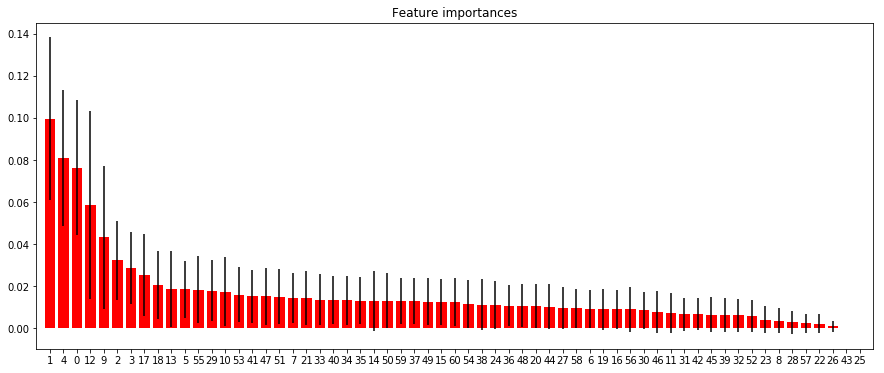

In [77]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(15,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [45]:
! pip install pdpbox

     |████████████████████████████████| 57.7MB 46.3MB/s eta 0:00:01
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57691479 sha256=025fd21e87be57b81e81f749be4486154198e735d41552732026379aa67c9cac
  Stored in directory: /home/ubuntu/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [49]:
import pdpbox
from pdpbox import pdp

In [80]:
# Your code here!

pdp_pedi_insul = pdp.pdp_interact(rf_clf,X_train,X_train.columns,['Duration','Amount'])

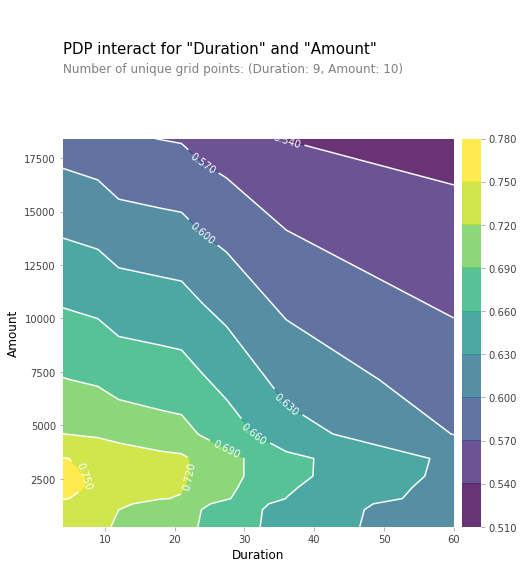

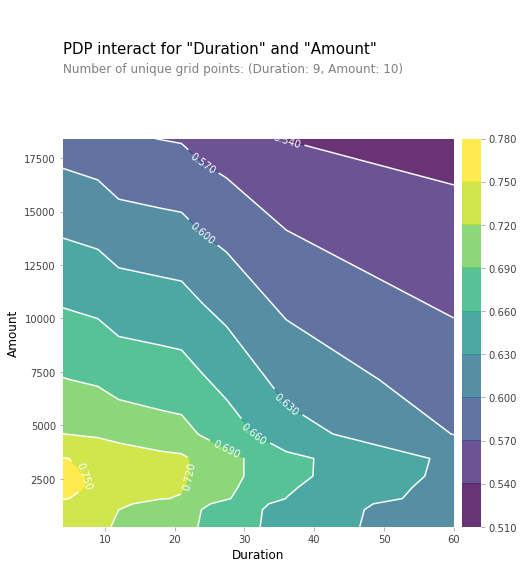

In [84]:
pdp.pdp_interact_plot(pdp_pedi_insul, ['Duration','Amount'])
pdp.plt.show()

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [16]:
! conda install -c anaconda py-xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.4
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base conda



NotWritableError: The current user does not have write permissions to a required path.
  path: /usr/local/anaconda/pkgs/conda-4.5.4-py36_0/info/repodata_record.json
  uid: 12574
  gid: 12574

If you feel that permissions on this path are set incorrectly, you can manually
change them by executing

  $ sudo chown 12574:12574 /usr/local/anaconda/pkgs/conda-4.5.4-py36_0/info/repodata_record.json

In general, it's not advisable to use 'sudo conda'.




In [ ]:
! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [76]:
from sklearn.preprocessing import LabelBinarizer

In [77]:
lb = LabelBinarizer()
y_train_b = lb.fit_transform(y_train)
y_test_b = lb.fit_transform(y_test)

In [17]:
import xgboost as xgb

In [28]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train_b)
data_dmatrix

In [33]:
X_train_dmatrix = xgb.DMatrix(X_train)

In [29]:
params_xg_cf = {  
    "booster":['gbtree'],
    "n_estimators": [1450,1550,1650,2000],
    "max_depth": [5,7,10,],
    "learning_rate": [0.05,0.01,0.1,0.3],
    "colsample_bytree": [0.8],
    "subsample": [0.8],
    "gamma": [0],
    'reg_alpha': [1],
    "min_child_weight": [1],
    "objective":["reg:logistic"]
}
xgbclf = xgb.XGBClassifier(nthreads=-1) 

In [30]:
grid_search_xgclf = GridSearchCV(estimator=xgbclf,param_grid=params_xg_cf,
scoring='roc_auc', cv=4, verbose=1)


In [40]:
y_train_b

array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [41]:
grid_search_xgclf.fit(X_train,y_train_b.ravel())

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:  6.7min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, nthreads=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'booster': ['gbtree'], 'n_estimators': [1450, 1550, 1650, 2000], 'max_depth': [5, 7, 10], 'learning_rate': [0.05, 0.01, 0.1, 0.3], 'colsample_bytree': [0.8], 'subsample': [0.8], 'gamma': [0], 'reg_alpha': [1], 'min_child_weight': [1], 'objective': ['reg:logistic']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [42]:
grid_search_xgclf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1450,
       n_jobs=1, nthread=None, nthreads=-1, objective='reg:logistic',
       random_state=0, reg_alpha=1, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8)

In [43]:
grid_search_xgclf.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 1450,
 'objective': 'reg:logistic',
 'reg_alpha': 1,
 'subsample': 0.8}

In [44]:
grid_search_xgclf.best_score_

0.7693278881578578

In [46]:
tuned_parms = {   "booster":'gbtree',
    "n_estimators": 1450,
    "max_depth": 5,
    "learning_rate": 0.01,
    "colsample_bytree": 0.8,
    "subsample": 0.8,
    "gamma": 0,
    'reg_alpha': 1,
    "min_child_weight": 1,
    "objective":"reg:logistic"
}

In [48]:
cv_xgb = xgb.cv(params = tuned_parms, dtrain = data_dmatrix, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100)

In [49]:
 cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
88,0.26250,0.034004,0.151875,0.007421
89,0.26250,0.035795,0.152500,0.006746
90,0.26375,0.033866,0.152500,0.006746
91,0.26125,0.032210,0.150938,0.008362
92,0.25625,0.036228,0.150938,0.008362


In [51]:
final_xgb = xgb.train(tuned_parms,data_dmatrix,num_boost_round=92)

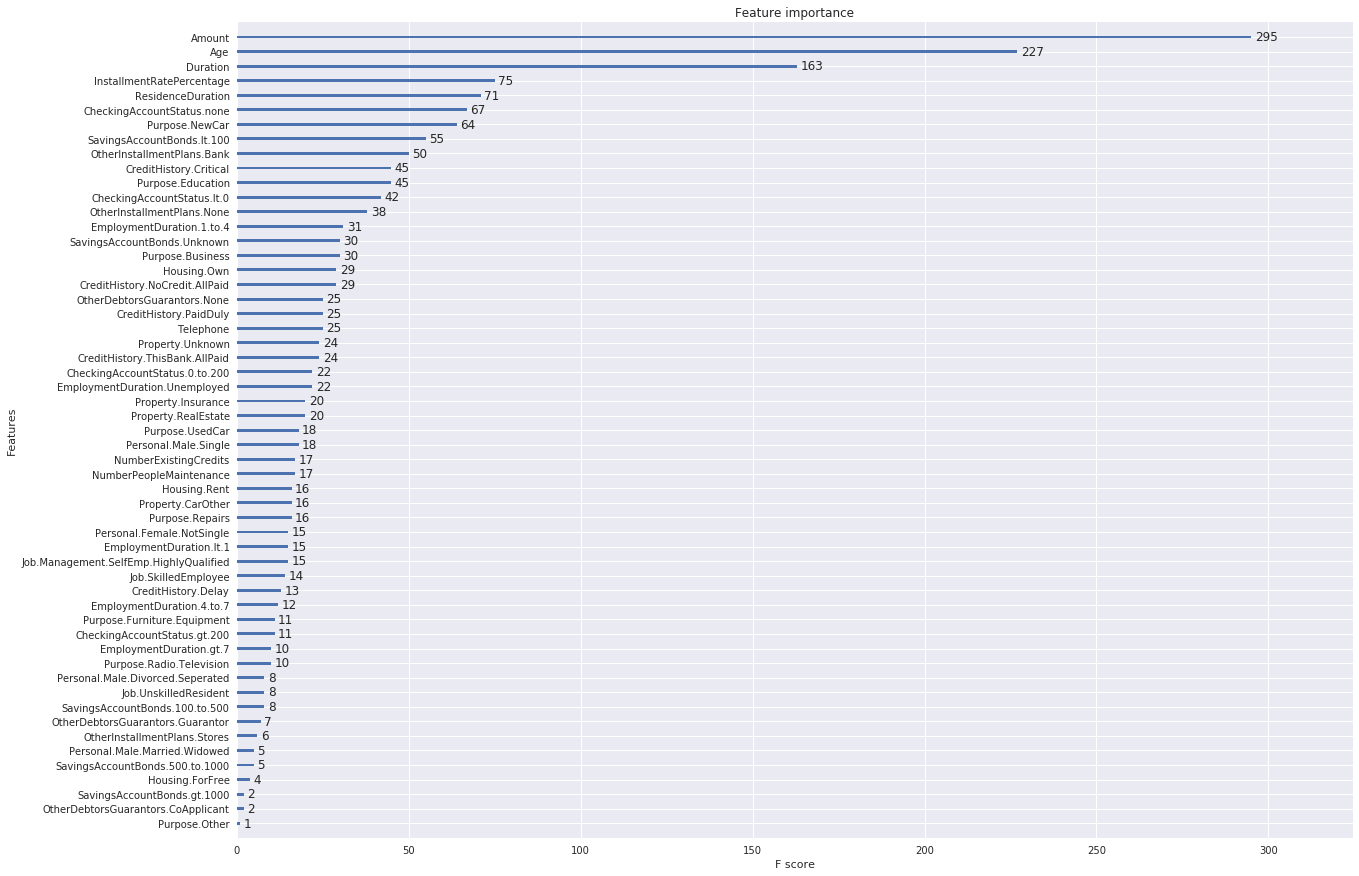

In [54]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1)
plt.rcParams['figure.figsize'] = [20, 15]
xgb.plot_importance(final_xgb)

In [55]:
testdmat = xgb.DMatrix(X_test)

In [75]:
y_train_b.ravel()

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1,

In [64]:
y_xgb_pred = final_xgb.predict(testdmat)
predictions = [round(value) for value in y_xgb_pred]

In [68]:
predictions

[1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0

In [76]:
print(classification_report(y_test_b.ravel(),predictions))

             precision    recall  f1-score   support

          0       0.71      0.41      0.52        59
          1       0.79      0.93      0.85       141

avg / total       0.76      0.78      0.75       200



In [74]:
y_test_b.ravel()

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [ ]:
! conda install -c conda-forge catboost

In [78]:
from catboost import CatBoostClassifier, Pool, cv

ModuleNotFoundError: No module named 'catboost'